# Seaborn Human Resources

#### Wczytanie Bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Wczytanie Bazy Danych

In [2]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


#### Stworzenie Obrazu Brakujących Danych

<Axes: >

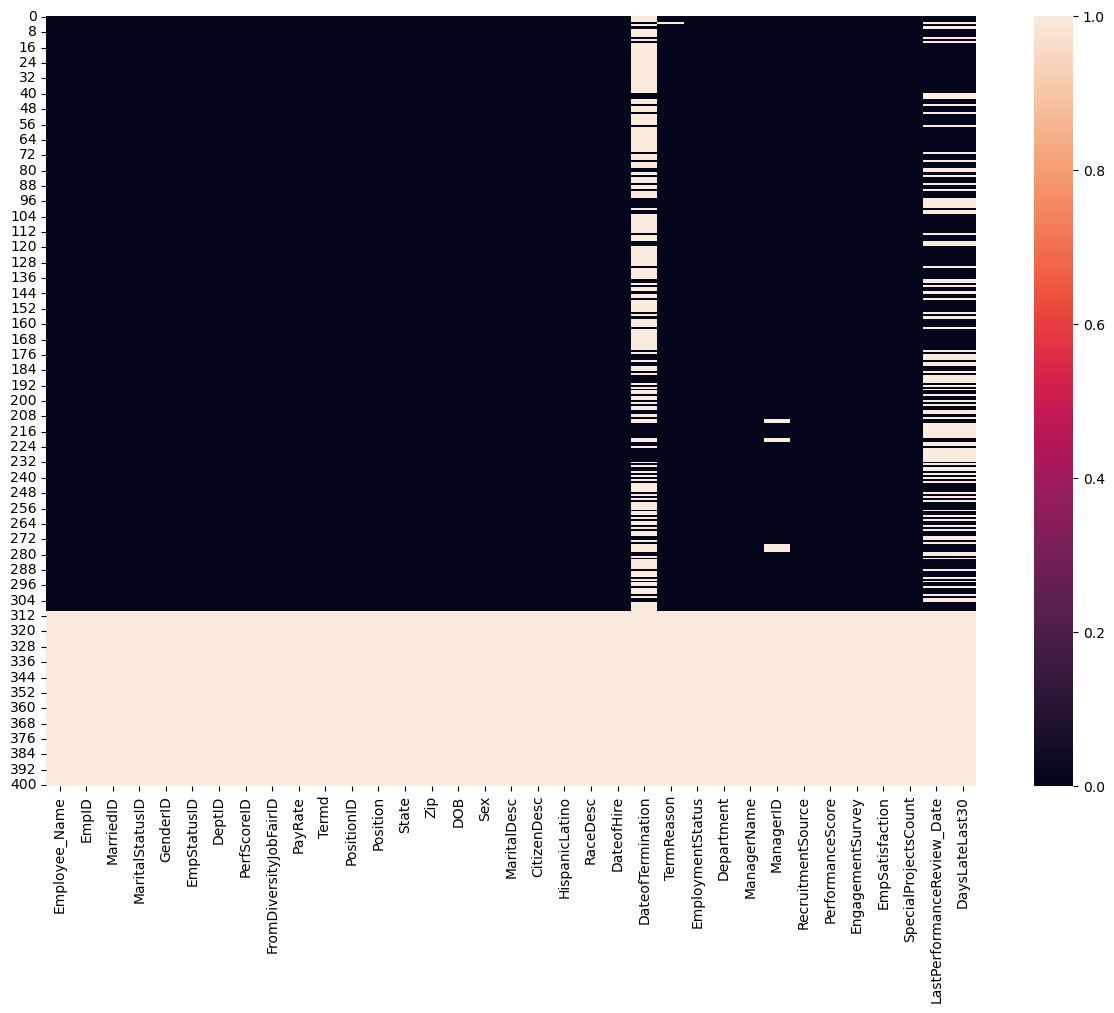

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

#### Dostosowanie Bazy Danych do Potrzeb Analizy

Usunięcie kolumn z dużymi brakami danych

In [4]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

Usunięcie wierszy z brakami danych

In [5]:
df.dropna(thresh=2,inplace=True)

<Axes: >

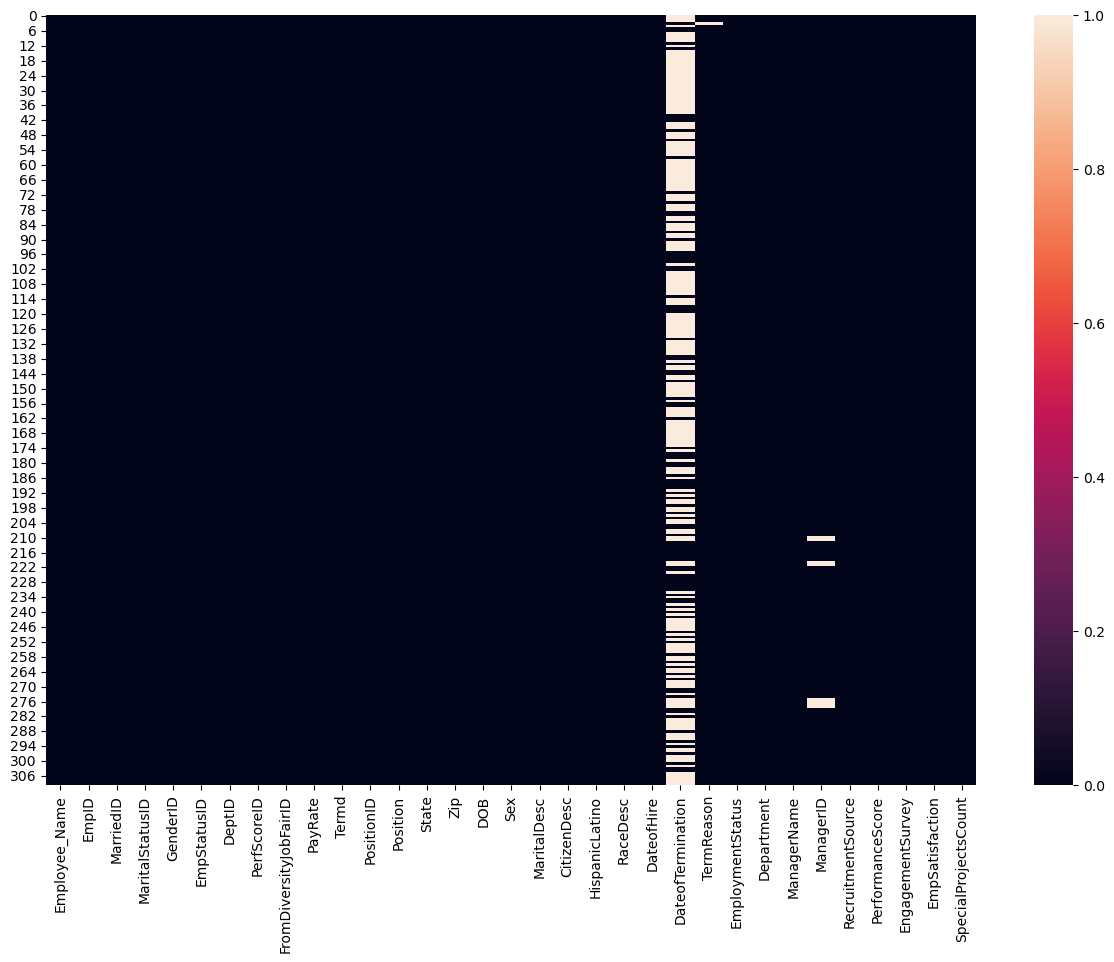

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

Dostosownie dat w bazie danych

In [7]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [8]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [9]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [10]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


#### Analiza danych

Ustawienie stylu

In [11]:
sns.set_style('darkgrid')

Histogram rozkładu wynagrodzeń

(0.0, 99.4175865710758)

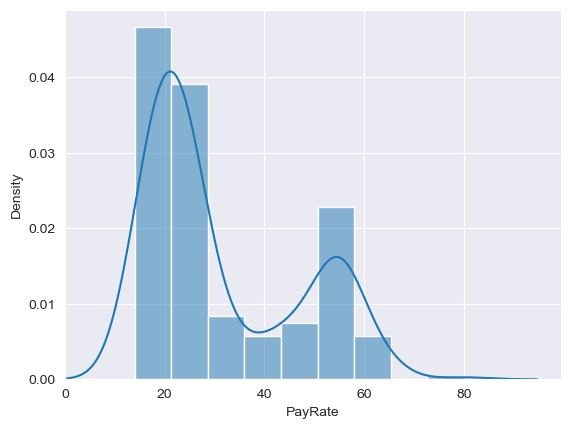

In [12]:
sns.histplot(df['PayRate'], stat='density', kde=False, bins=9, alpha=0.5)
sns.kdeplot(df['PayRate'])
plt.xlim(left=0)

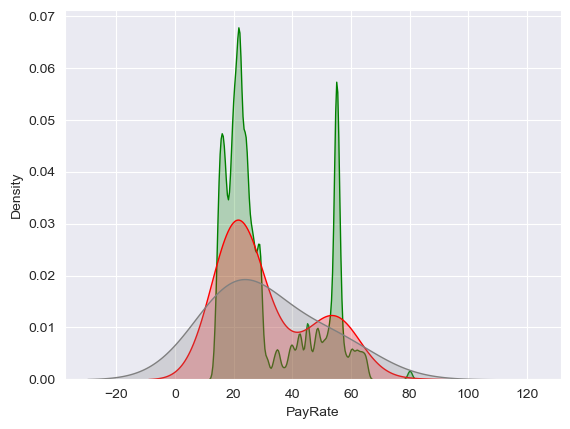

In [13]:
sns.kdeplot(df['PayRate'], fill=True, bw_method=.05, color="green")
sns.kdeplot(df['PayRate'], fill=True, bw_method=.5, color="red")
sns.kdeplot(df['PayRate'], fill=True, bw_method=.95, color="gray")
plt.show()

Ankieta zaangażowania, a wynagrodzenie

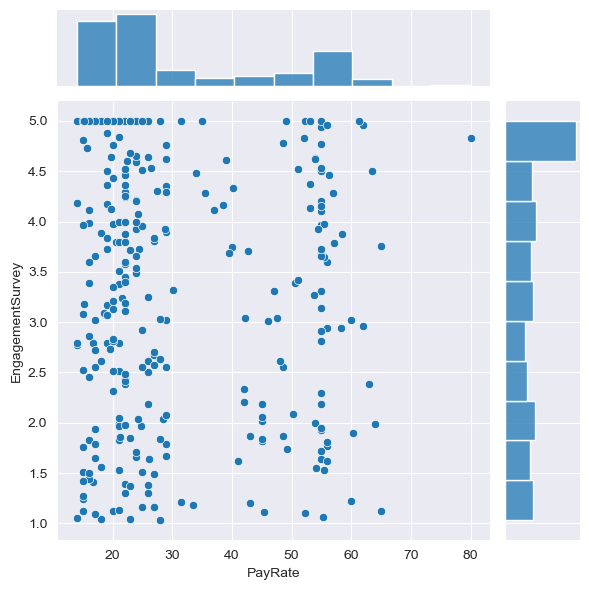

In [14]:
sns.jointplot(x='PayRate',y='EngagementSurvey',data=df)

Obliczenie stażu pracy

In [15]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire']).days / 365.25

Uzupelnienie bazy danych

In [16]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.915811
1,2014-01-06,NaT,5.722108
2,2014-09-29,NaT,4.993840
3,2015-02-16,2015-04-15,0.158795
4,2015-05-01,NaT,4.407940


Wynagrodzenie, a staż pracy

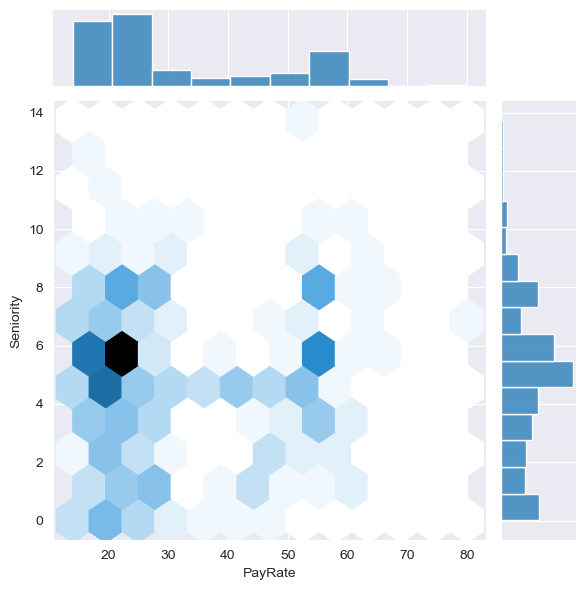

In [17]:
sns.jointplot(x='PayRate',y='Seniority',data=df,kind='hex')

Zbiór wykresów punktowych dla wszystkich zmiennych liczbowych *ID

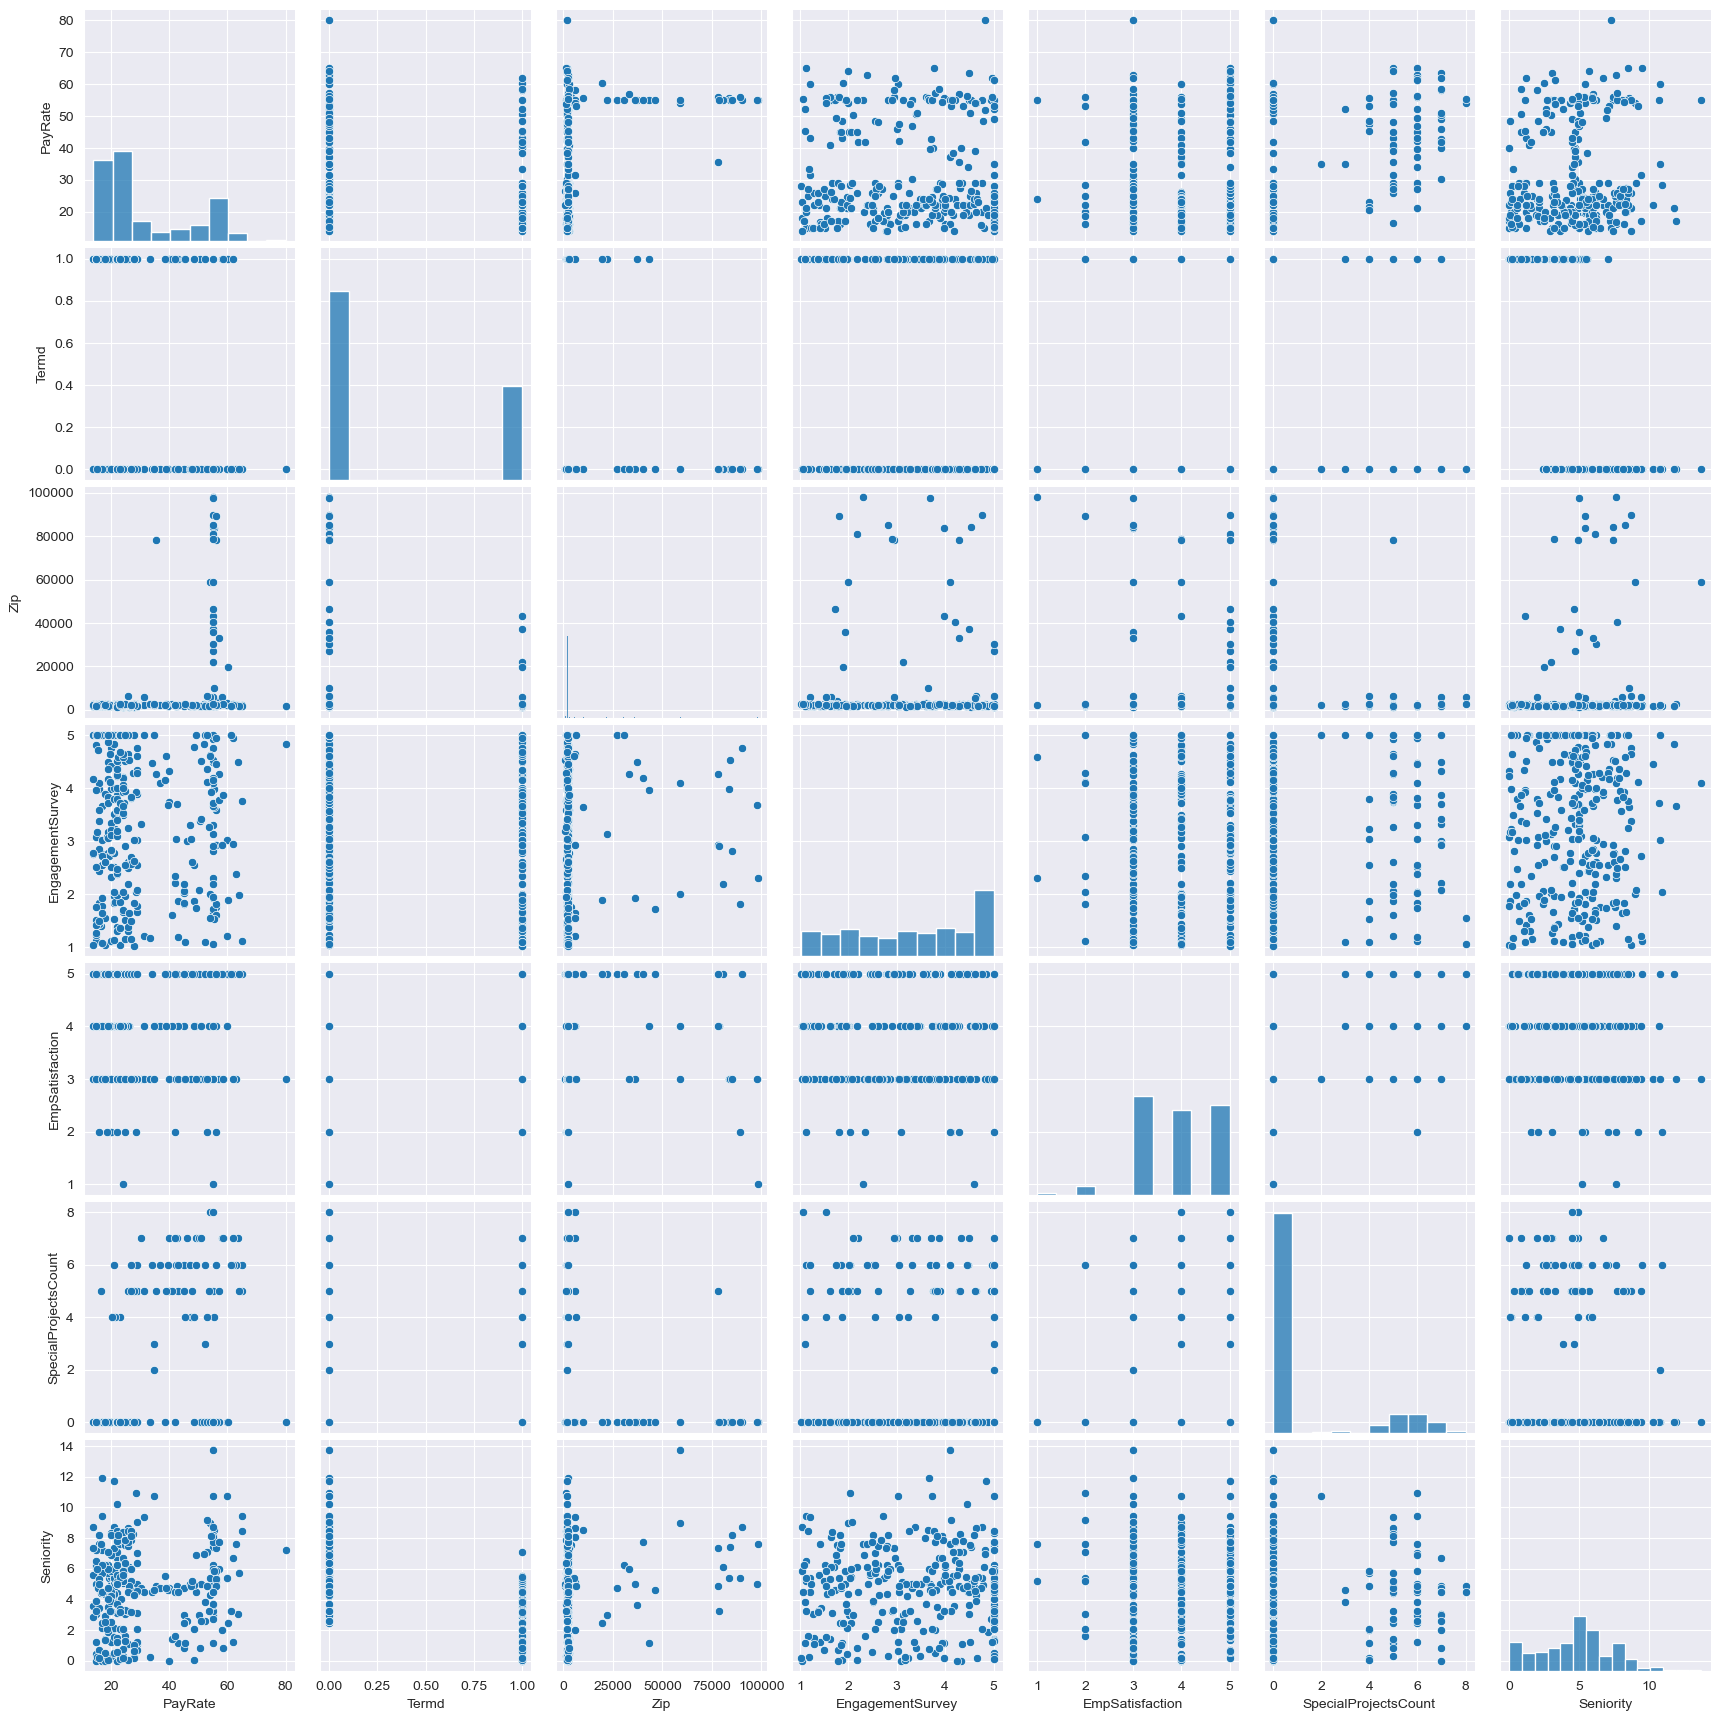

In [18]:
sns.pairplot(df[df.columns[~df.columns.str.endswith('ID')]].select_dtypes(float))

Wykresy słupkowe: wynagrodzenie, a stanowisko (średnia i mediana)

<Axes: xlabel='Department', ylabel='PayRate'>

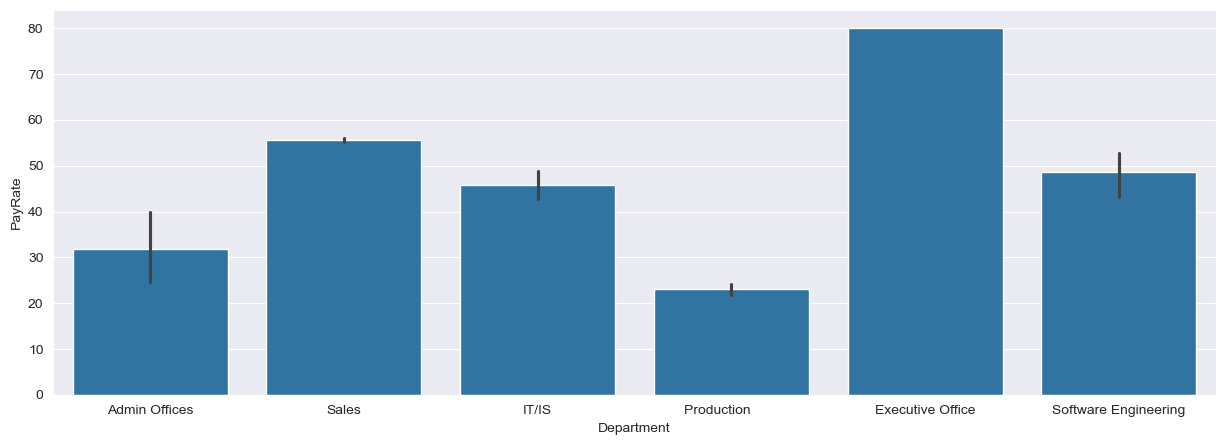

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df)

<Axes: xlabel='Department', ylabel='PayRate'>

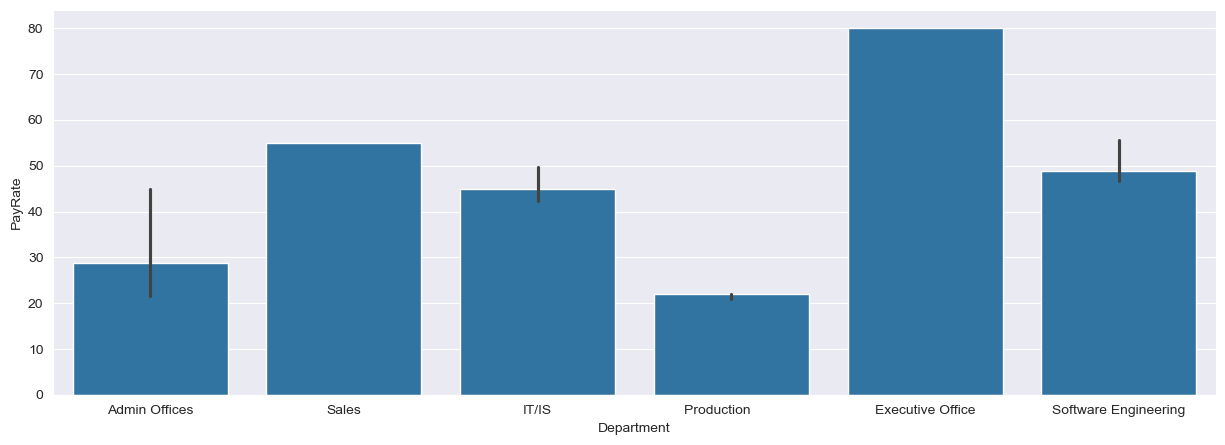

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df,estimator=np.median)

Zatrudnienie w poszczególnych działach

<Axes: xlabel='Department', ylabel='count'>

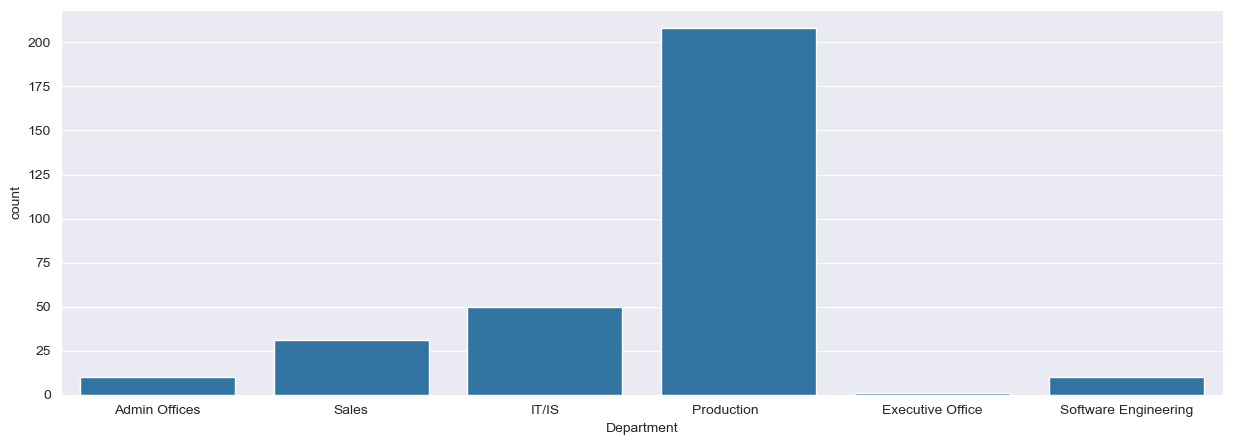

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='Department',data=df)

Wynagrodzenie, a płeć

<Axes: xlabel='Sex', ylabel='PayRate'>

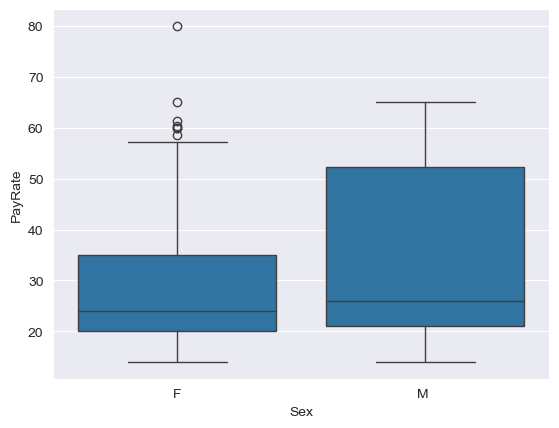

In [22]:
sns.boxplot(x='Sex',y='PayRate',data=df)

Departament pracownika ze względu na płeć

In [23]:
pd.crosstab(df['Department'],df['Sex'])

Sex,F,M
Department,,
Admin Offices,6,4
Executive Office,1,0
IT/IS,22,28
Production,127,81
Sales,15,16
Software Engineering,6,4


Rozkład zarobków ze względu na płeć w mniejszości latynoskiej

<Axes: xlabel='Sex', ylabel='PayRate'>

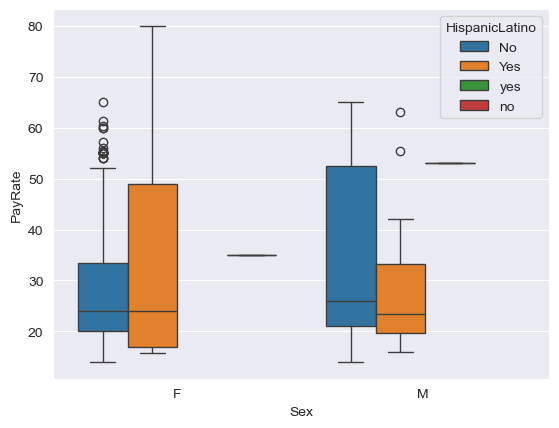

In [24]:
sns.boxplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino')

<Axes: xlabel='Sex', ylabel='PayRate'>

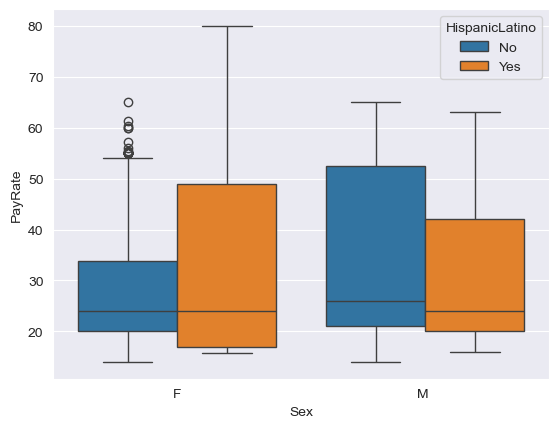

In [25]:
df['HispanicLatino'] = df['HispanicLatino'].str.title()
sns.boxplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino')

Przedstawienie danych jako violinplot (połączenie boxplot i kde)

<Axes: xlabel='Sex', ylabel='PayRate'>

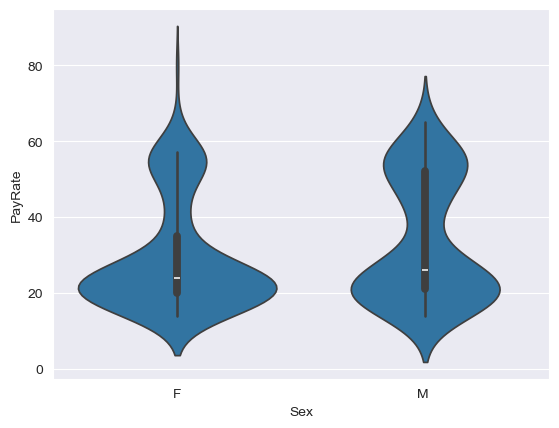

In [26]:
sns.violinplot(x='Sex',y='PayRate',data=df)

<Axes: xlabel='Sex', ylabel='PayRate'>

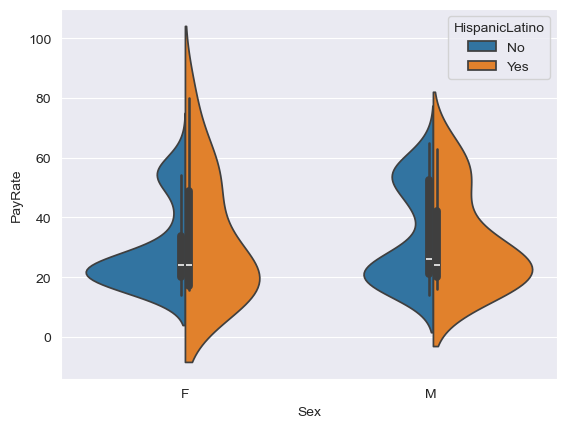

In [27]:
sns.violinplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino',split=True)

Przedstawienie danych na siatce wykresów

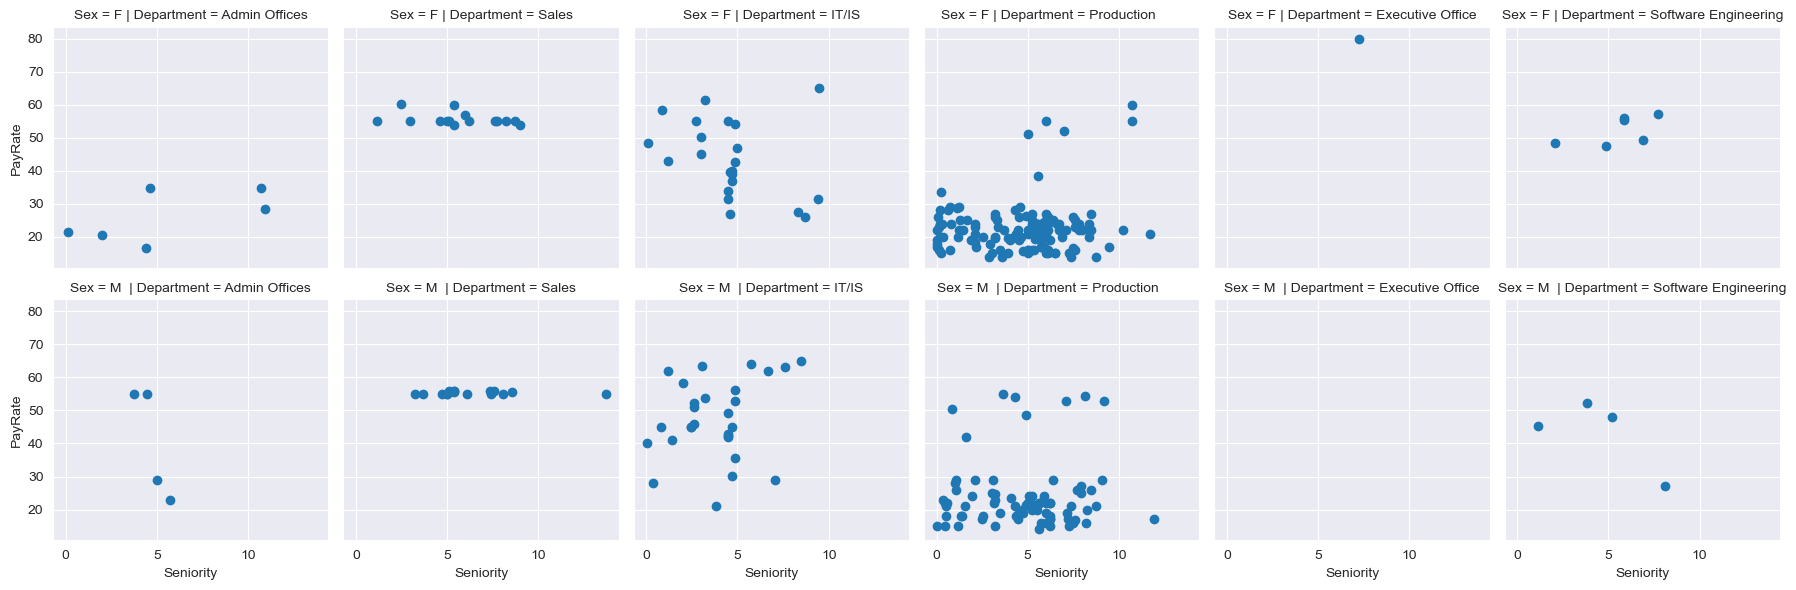

In [28]:
g = sns.FacetGrid(data=df,col='Department',row='Sex')
g.map(plt.scatter,'Seniority','PayRate')

Dział produkcji na wykresie regresji liniowej

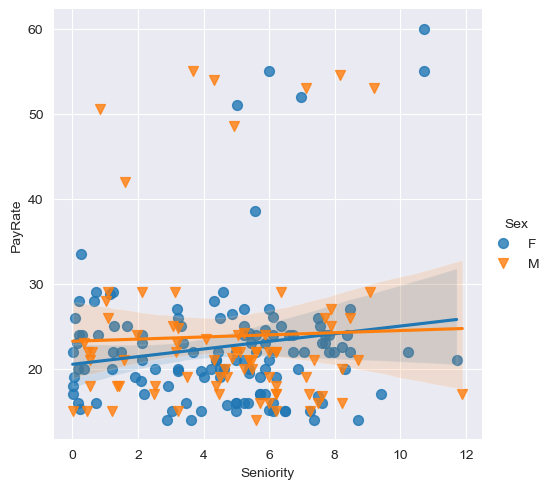

In [29]:
sns.lmplot(x='Seniority', y='PayRate', data=df[(df['Department']=='Production       ')], hue='Sex', markers=['o', 'v'], scatter_kws={'s':50})

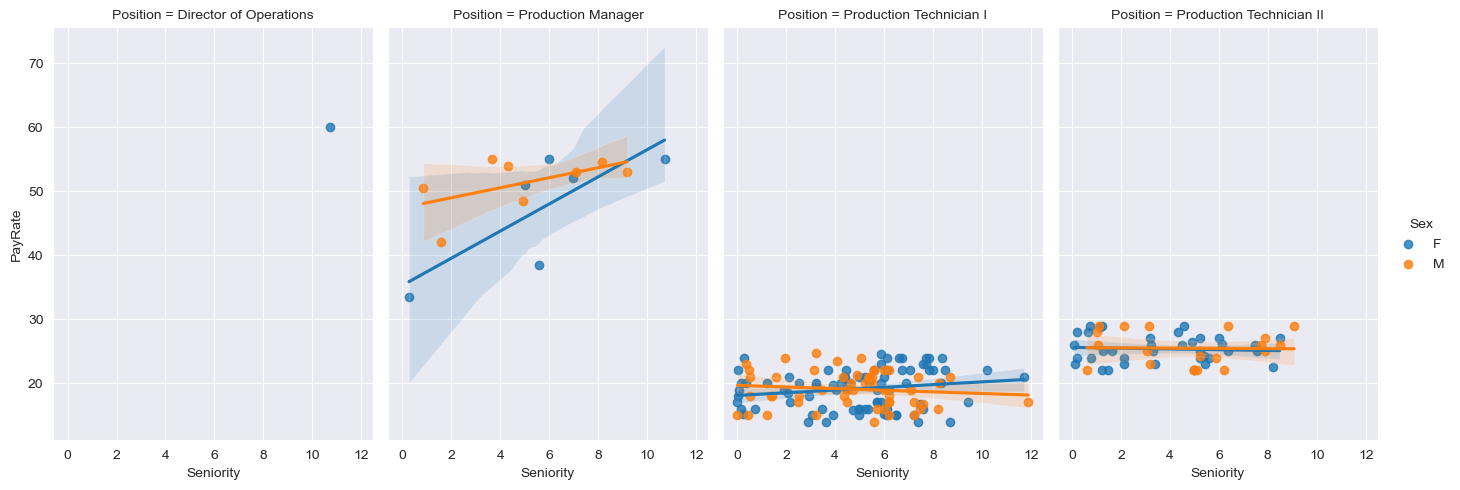

In [30]:
sns.lmplot(x='Seniority',y='PayRate',data=df[(df['Department']=='Production       ')],col='Position',hue='Sex',aspect=0.7)

Mapa cieplna okresu zatrudnienia

In [31]:
df.pivot_table(index=df['DateofHire'].dt.month,columns=df['DateofHire'].dt.day,values='EmpID',aggfunc='count').fillna(0)

DateofHire,1,2,3,4,5,6,7,8,9,10,...,20,21,24,25,26,27,28,29,30,31
DateofHire,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,16.0,5.0,6.0,1.0,9.0,14.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,3.0
4,3.0,9.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
5,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
7,0.0,3.0,0.0,1.0,11.0,4.0,9.0,9.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,9.0,1.0,0.0,11.0,10.0,0.0


<Axes: xlabel='DateofHire', ylabel='DateofHire'>

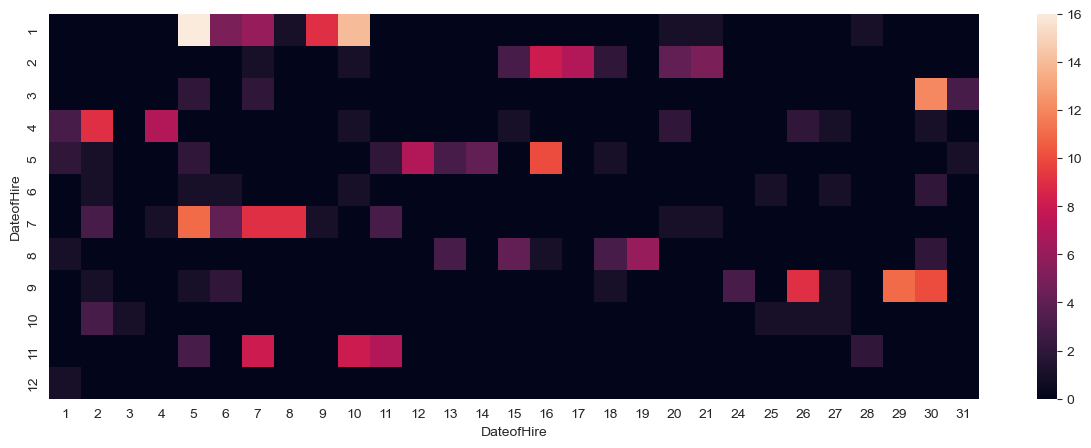

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(index=df['DateofHire'].dt.month,columns=df['DateofHire'].dt.day,values='EmpID',aggfunc='count').fillna(0))

#### Praca z pakietem gmplot

Wczytanie danych geograficznych i połączenie z bazą danych

In [33]:
zip_codes = pd.read_csv('us-zip-code-latitude-and-longitude.csv',sep=';')
zip_codes.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027"


In [34]:
df_mapping = df[['Zip','PayRate']].copy()
df_mapping.head()

,Zip,PayRate
0,1450.0,28.50
1,1460.0,23.00
2,2703.0,29.00
3,2170.0,21.50
4,2330.0,16.56


In [35]:
df_mapping = df_mapping.join(zip_codes.set_index('Zip')[['Latitude','Longitude']],on='Zip',how='left')
df_mapping.head()

,Zip,PayRate,Latitude,Longitude
0,1450.0,28.50,42.609887,-71.55722
1,1460.0,23.00,42.540052,-71.49085
2,2703.0,29.00,41.928099,-71.31456
3,2170.0,21.50,42.267049,-71.01834
4,2330.0,16.56,41.873697,-70.76560


Import biblioteki gmplot, dotenv i os oraz dodanie klucza API

In [36]:
import gmplot
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv('GOOGLEMAP_API_KEY')

Przygotowanie i normalizacja danych

In [37]:
locations = df_mapping[['Latitude','Longitude']].dropna()
weights = df_mapping['PayRate'].dropna()

latitude = locations['Latitude']
longitude = locations['Longitude']
weights /= weights.max()

Inicjalizacja obiektu GoogleMapPlotter

In [38]:
gmap = gmplot.GoogleMapPlotter(
    np.median(latitude),
    np.median(longitude),
    zoom=8,
    apikey=api_key
)

Stworzenie mapy cieplnej

In [39]:
gmap.heatmap(latitude, longitude, weights=weights)
gmap.draw('output.html')

Otworzenie mapy w notatniku

In [40]:
from IPython.display import IFrame

display(IFrame(src='output.html', width=500, height=500))

## Cwiczenia

##### Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

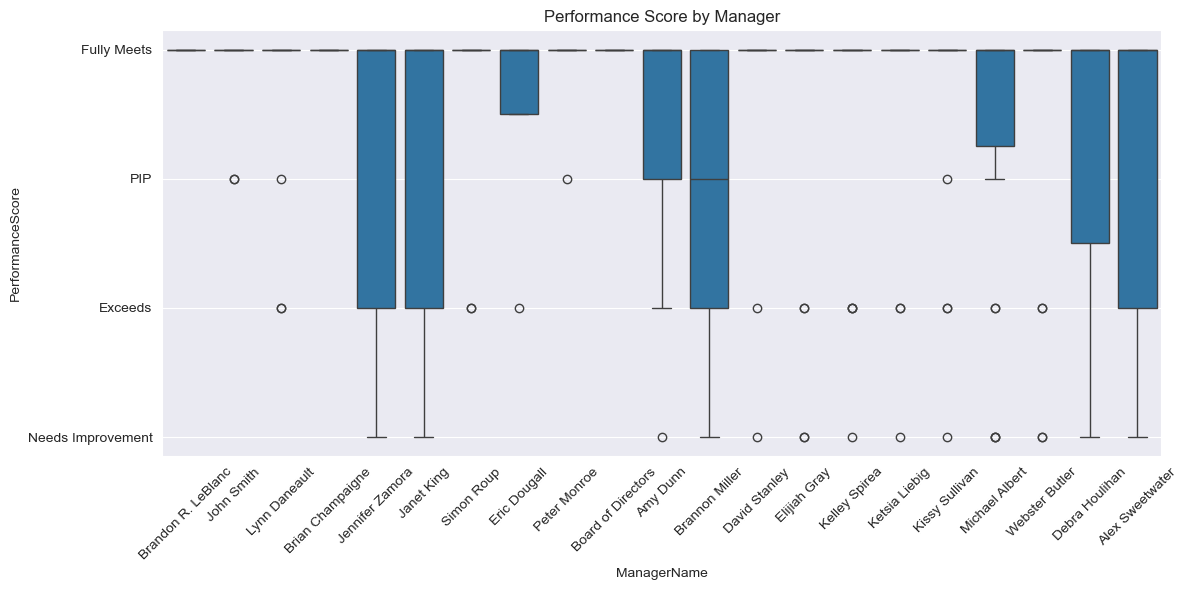

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ManagerName', y='PerformanceScore', data=df)
plt.xticks(rotation=45)
plt.title('Performance Score by Manager')
plt.tight_layout()
plt.show()

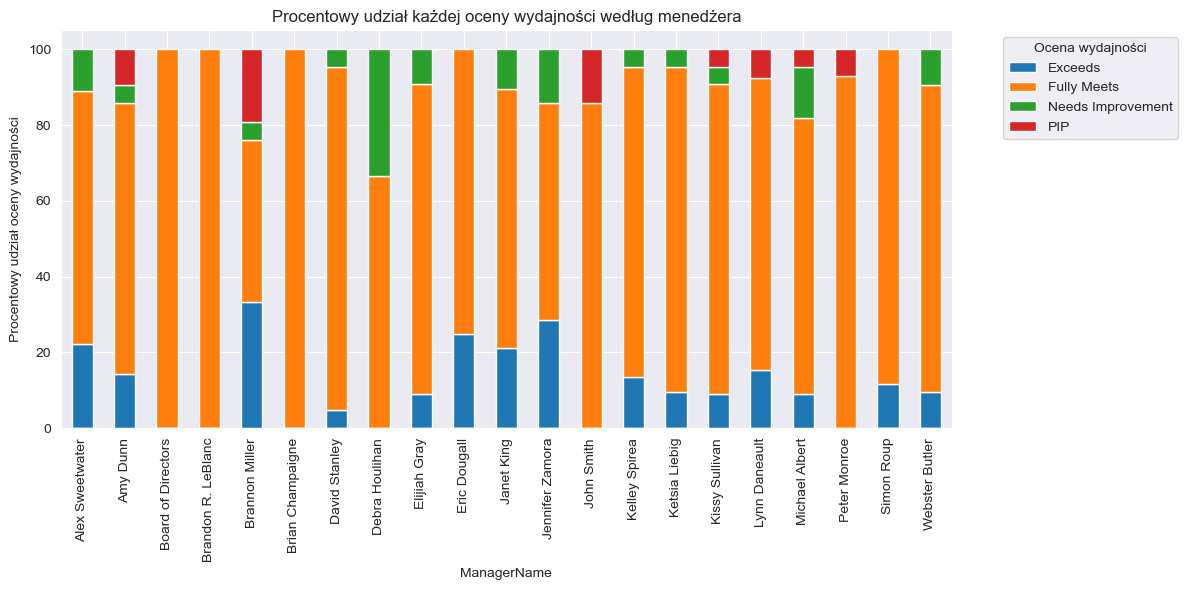

In [42]:
# Oblicz liczbę ocen wydajności przypisanych do każdego menedżera
counts = df.groupby(['ManagerName', 'PerformanceScore']).size().reset_index(name='Count')

# Przekształć dane, aby mieć oceny wydajności (PerformanceScore) jako kolumny
pivot = counts.pivot(index='ManagerName', columns='PerformanceScore', values='Count').fillna(0)

# Oblicz procentowe udziały
percentages = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Wygeneruj wykres słupkowy skumulowany
percentages.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.ylabel('Procentowy udział oceny wydajności')
plt.title('Procentowy udział każdej oceny wydajności według menedżera')
plt.legend(title='Ocena wydajności', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Jest kilku managerów, którzy dają tylko ocenę "Fully Meets" oraz kilka osób, których oceny są bardziej rozłóżone na inne kategorie, na tym tle wyróżnia się manager Brannon Miller i Deborah Houlihan. 

##### Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

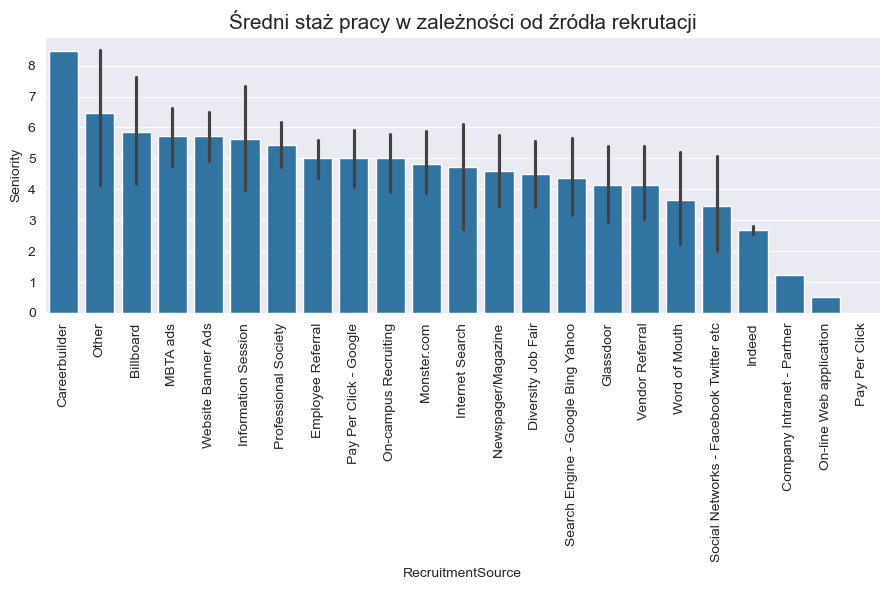

In [90]:
mean_seniority = df.groupby('RecruitmentSource')['Seniority'].mean().sort_values(ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(x='RecruitmentSource', y='Seniority', data=df, estimator=np.mean, order=mean_seniority.index)
plt.title('Średni staż pracy w zależności od źródła rekrutacji', size=15)
plt.xticks(rotation=90, size=10)
plt.yticks(size=10)
plt.tight_layout()
plt.show()

##### Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)

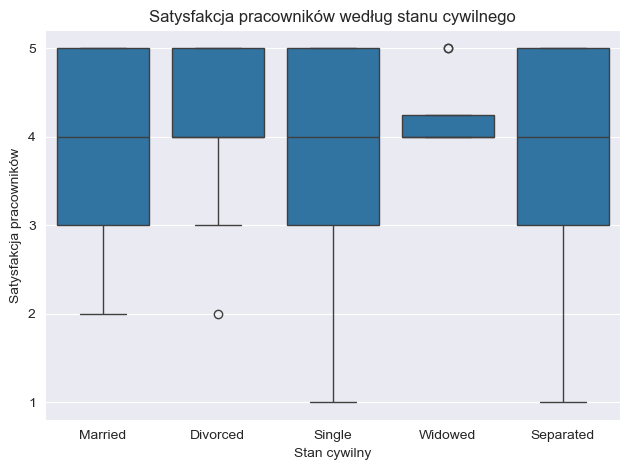

In [68]:
plt.figure()
sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=df)
plt.title('Satysfakcja pracowników według stanu cywilnego')
plt.xlabel('Stan cywilny')
plt.ylabel('Satysfakcja pracowników')
plt.yticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

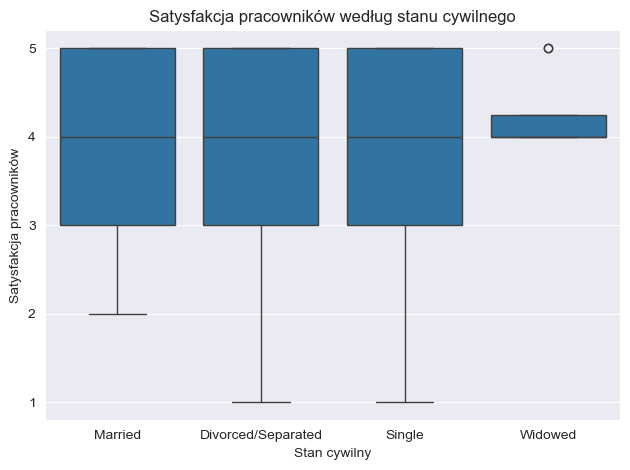

In [ ]:
df['MaritalDescCombined'] = df['MaritalDesc'].replace({'Divorced': 'Divorced/Separated', 'Separated': 'Divorced/Separated'})

plt.figure()
sns.boxplot(x='MaritalDescCombined', y='EmpSatisfaction', data=df)
plt.title('Satysfakcja pracowników według stanu cywilnego')
plt.xlabel('Stan cywilny')
plt.ylabel('Satysfakcja pracowników')
plt.yticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

##### Struktura wieku aktualnie zatrudnionych pracowników


Obliczenie wieku pracowników

In [75]:
def adjust_dob(dob):
    if dob.year > 2000:
        dob = dob.replace(year=dob.year - 100)
    return dob

df['DOB'] = df['DOB'].apply(adjust_dob)

def calculate_age(dob, end_date=dt.datetime(2019, 9, 27)):
    return (end_date - dob).days // 365

df['Age'] = df['DOB'].apply(calculate_age)
df[['Employee_Name', 'DOB', 'Age']]

,Employee_Name,DOB,Age
0,"Brown, Mia",1987-11-24,31
1,"LaRotonda, William",1984-04-26,35
2,"Steans, Tyrone",1986-09-01,33
3,"Howard, Estelle",1985-09-16,34
4,"Singh, Nan",1988-05-19,31
...,...,...,...
305,"Daniele, Ann",1952-01-18,67
306,"Lajiri, Jyoti",1986-04-23,33
307,"Semizoglou, Jeremiah",1983-02-09,36
308,"South, Joe",1965-09-09,54


Przedstawienie struktury wieku na wykresie

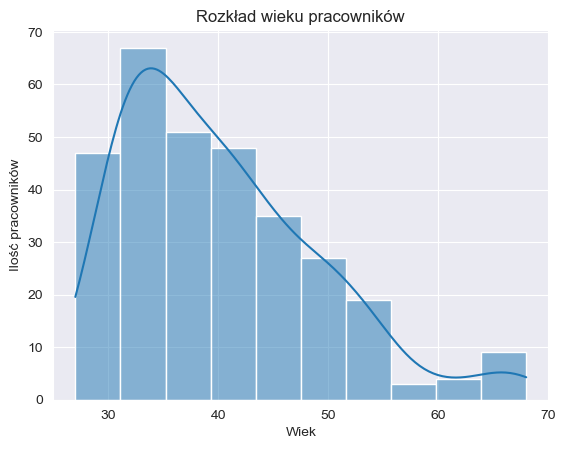

In [80]:
plt.figure()
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Rozkład wieku pracowników')
plt.xlabel('Wiek')
plt.ylabel('Ilość pracowników')
plt.show()

##### Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

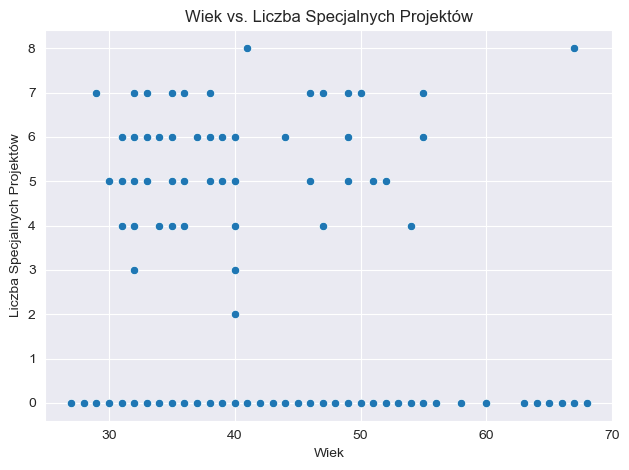

In [87]:
plt.figure()
sns.scatterplot(x='Age', y='SpecialProjectsCount', data=df)
plt.title('Wiek vs. Liczba Specjalnych Projektów')
plt.xlabel('Wiek')
plt.ylabel('Liczba Specjalnych Projektów')
plt.tight_layout()
plt.show()

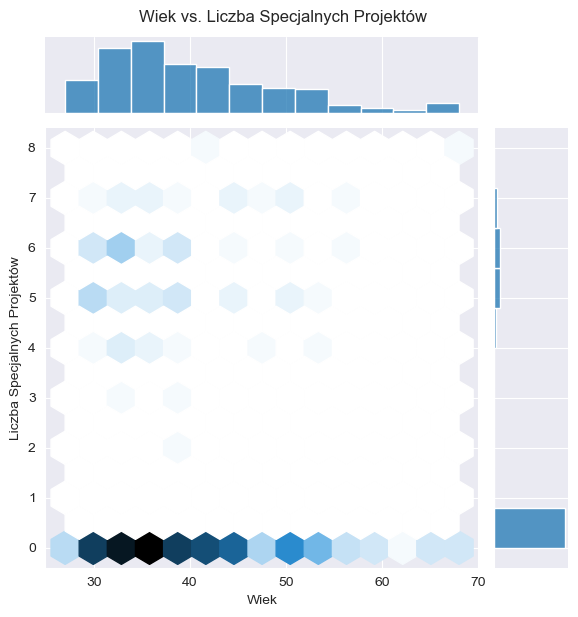

In [88]:
sns.jointplot(x='Age', y='SpecialProjectsCount', data=df, kind='hex')
plt.suptitle('Wiek vs. Liczba Specjalnych Projektów', y=1.02)
plt.xlabel('Wiek')
plt.ylabel('Liczba Specjalnych Projektów')
plt.show()